<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/payoff_structure_hw3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that,

Written K-strike straddle is a portfolio of

- selling K-strike call of one unit
- selling K-strike put of one unit

Butterfly with three stikes $K_1 < K_2 < K_3$ is the portfolio of

- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a diagram of exercise price versus payoff for the following portfolios:

- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

__Soln:__

When selling one unit European call with 
strike $K$ and exercise price $S$, the payoff is given as
$$C(S, K)= (K - S)^+ = \max\{K - S, 0\}.$$
Similarly, when selling one unit European put with 
strike $K$ and exercise price $S$, the payoff is given as
$$P(S, K)= (K - S)^- = \max\{S - K, 0\}.$$
Thus, the payoff of written K-strike straddle is given as

\begin{equation}
\begin{split}
V &= C(S, K) + P(S, K) \\
&= \max\{K-S, 0\} + \max\{S-K, 0\} \\
&= \max\{K-S, S-K\}.
\end{split}
\end{equation}

Assuming that when selling one unit European call and one unit put option, the seller will get \$ $1$.

#https://en.wikipedia.org/wiki/Butterfly_(options)


In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 40.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (k - s)*otype])

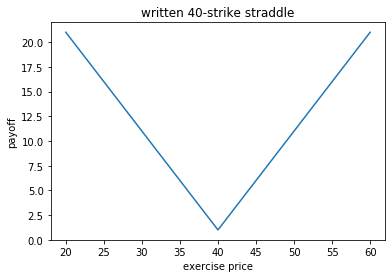

In [4]:
import numpy as np
import matplotlib.pyplot as plt

opt1 = VanillaOption(otype = 1) 
opt2 = VanillaOption(otype = -1)
stk_list = range(20, 61)
#c=[a[i]+b[i] for i in range(min(len(a),len(b)))]
payoff_1 = [opt1.payoff(s) for s in stk_list]
payoff_2 = [opt2.payoff(s) for s in stk_list] 
payoff = [payoff_1[i] + payoff_2[i] + 1 for i in range(len(stk_list))]
plt.plot(stk_list, payoff)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('written 40-strike straddle');
plt.show()